In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### Familiarización con los datos

In [2]:
url = "../Dataset/datos_negocios_limpios.csv"
df = pd.read_csv(url)

def funcion1(a):
    if(a!="Sin atributos"):
        return eval(a)

def funcion2(a):
    if(a!="Sin horas"):
        return eval(a)
    
df["categorias"]=df["categorias"].apply(lambda s: eval(s))
df["atributos"]=df["atributos"].apply(lambda s: funcion1(s))
df["horas"]=df["horas"].apply(lambda s: funcion2(s) )
df

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"[Golf, Active Life]",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","[Specialty Food, Restaurants, Dim Sum, Impo...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","[Sushi Bars, Restaurants, Japanese]","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"[Insurance, Financial Services]","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","[Plumbing, Shopping, Local Services, Home S...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,Sin direccion,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"[Water Purification Services, Water Heater In...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","[Books, Mags, Music & Video, Shopping]",None
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","[Home Services, Contractors, Landscaping, M...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
192607,zNMupayB2jEHVDOji8sxoQ,Beasley's Barber Shop,4406 E Main St,Mesa,AZ,85205,33.416137,-111.735743,4.5,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","[Beauty & Spas, Barbers]","{'Tuesday': '8:30-17:30', 'Wednesday': '8:30-1..."


En un primer lugar, como estamos tratando un csv guardado por nosotros en la parte de preprocesado (en el notebook de preprocesado_negocios), hemos comprobado que en el csv los atributos con listas y diccionarios se guardan como string, es decir, "[ "" ] " (en el caso de las listas y " { "" } " (en el caso de los diccionarios.

Por ello, para facilitar la utilización de dichos campos hemos decido pasar los valores de dichos atributos a código python. 

In [3]:
print(list(df.columns))

['negocio_id', 'nombre', 'direccion', 'ciudad', 'estado', 'codigo_postal', 'latitud', 'longitud', 'puntuacion', 'num_revisiones', 'abierto', 'atributos', 'categorias', 'horas']


Nos encontramos en un dataset de negocios en el que se habla de donde se situan, que puntuacion tienen y horario de apertura y características del negocio. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

   - **negocio_id**: Una cadena de caracteres alfanumérica que identifica unequivocamente a un negocio.

   - **nombre**: El nombre del negocio. Podemos suponer que puede incluir algunas de las categorias del negocio, dando una buena pista a la hora de predecir las categorias de un negocio.

   - **direccion, ciudad, estado, codigo postal, latitud y longitud**: Indican la posición geográfica del negocio.

   - **puntucacion**: Indica que tan buenos son los negcios según los usuarios que los han puntuado.

   - **num_revisiones**: Número de veces que usuarios han puntuado este negocio.

   - **abierto**: Indica si el negocio sigue ofreciendo servicios o ha cerrado. Se puede imaginar que un negocio con muchas revisiones es difícil que cierre porque tiene muchos clientes.
   
   - **atributos**: String que contiene un diccionario que incluye diferentes caracteristicas que puede cumplir el negocio, como ser bueno para niños o el nivel de ruido que tiene.
   
   - **categorias**: String que contiene una lista de las categorías que cumple el negocio.
   
   - **horas**: String que contiene un diccionario que indica las diferentes horas a las que abre el negocio cada día.


### Análisis descriptivo de los datos

In [4]:
df.describe()

,latitud,longitud,puntuacion,num_revisiones,abierto
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,38.541803,-97.594785,3.585627,33.538962,0.823040
std,4.941964,16.697725,1.018458,110.135224,0.381635
min,33.204642,-115.493471,1.000000,3.000000,0.000000
25%,33.637408,-112.274677,3.000000,4.000000,1.000000
50%,36.144815,-111.759323,3.500000,9.000000,1.000000
75%,43.602989,-79.983614,4.500000,25.000000,1.000000
max,51.299943,-72.911982,5.000000,8348.000000,1.000000


Observando la tabla descriptiva de los datos, podemos obtener la siguiente información:
   - **Puntuación**: Podemos observar que la media de la puntuación de los negocios esta en torno al 3.6.

   - **Num_revisiones**: Podemos observar que el valor del número de revisiones máximo es muy elevado en comparación con la media de revisiones, lo que quiere decir que existen negocios muy populares entre la gente. 
   - **Abierto**: 
        - El porcentaje de negocios abiertos es del **82,3%**
        - El porcentaje de negocios cerrados es del **17,7%**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

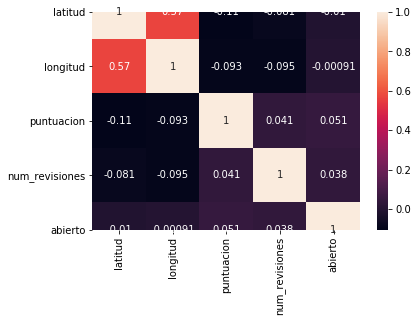

In [6]:
sns.heatmap(df.corr(), annot = True)

Se ha realizado un análisis de correlación con el objetivo de detectar si en el conjunto de datos de negocios existen datos que esten correlados.

Pero como se puede observar tanto la puntuación, el número de revisiones y si está abierto o no no tienen ninguna correlación con ninguún atributos, aunque pudiera parecer de primeras sin haber hecho dicho análisis de correlación que la puntuación pudiera tener relación con el número de revisiones.

Lo que si que parece estar correlado son la logitud y la latitud, lo que tiene sentido puesto que ambos atributos juntos determinan la posición de los negocios sin llegar a necesitar una dirección.

## Distribución de la puntuación

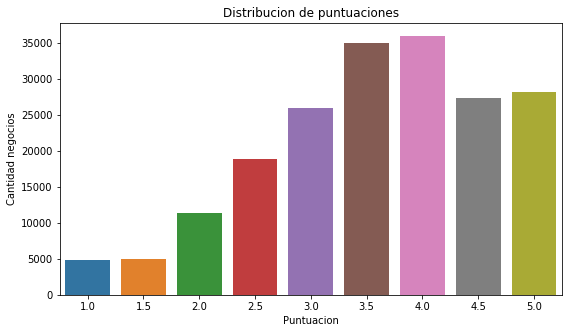

In [7]:
x = df["puntuacion"].value_counts()
x = x.sort_index()
plt.figure(figsize=(9,5))
ax=sns.barplot(x.index, x.values)
plt.title ("Distribucion de puntuaciones")
plt.ylabel("Cantidad negocios")
plt.xlabel("Puntuacion")
plt.show()


Lo que se trata de representar con la gráfica anterior es la distribució de la puntaciones del conjunto de negocios (se incluye tanto cerrados como abiertos). En ella se puede observar que hay un gran número de negocios que tienen puntuaciones medias entre 3.5 y 4. Pero no se ve que dicha distribución siga una normal. 

## Distribuciones de negocios abiertos y cerrados

In [8]:
url = "../Dataset/datos_negocios_limpios_categoriasExtendidas.csv"
df = pd.read_csv(url)
grouped = df.groupby('abierto')
abiertos=grouped.get_group(1)
cerrados=grouped.get_group(0)

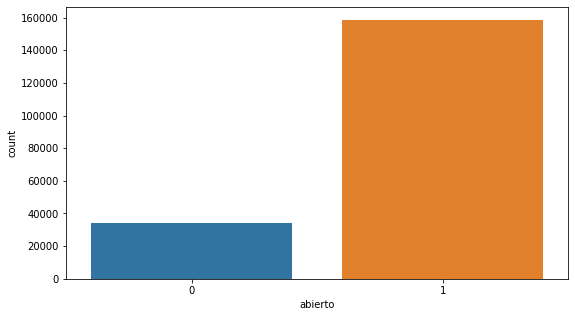

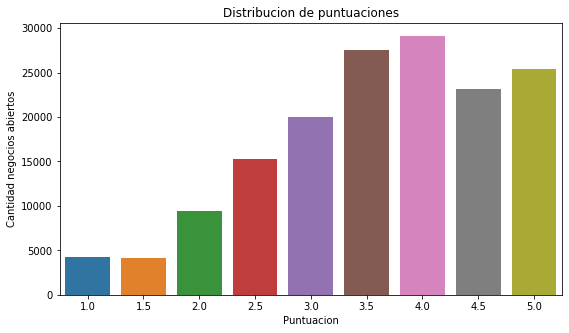

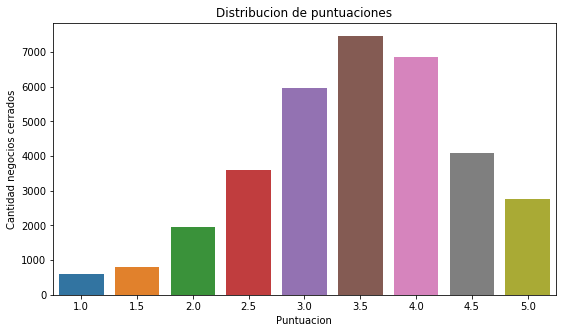

In [9]:
plt.figure(figsize=(9,5))
sns.countplot (x="abierto", data=df)
x = abiertos["puntuacion"].value_counts()
y = cerrados["puntuacion"].value_counts()
x = x.sort_index()
y = y.sort_index()
plt.figure(figsize=(9,5))
ax=sns.barplot(x.index, x.values)
plt.title ("Distribucion de puntuaciones")
plt.ylabel("Cantidad negocios abiertos")
plt.xlabel("Puntuacion")
plt.show()
plt.figure(figsize=(9,5))
ay=sns.barplot(y.index, y.values)
plt.title ("Distribucion de puntuaciones")
plt.ylabel("Cantidad negocios cerrados")
plt.xlabel("Puntuacion")
plt.show()

Con el objetivo de ver como se distribuyen los negocios se han realizado las gráficas anteriores donde se puede comentar lo siguiente:

- **Negocios abiertos**: Se puede observar que el número de negocios abiertos es mucho mayor que el de cerrados, consideración que se deberá tener en cuenta si se quiere realizar una predicción de negocios abiertos y cerrados, puesto que las clases estaría desbalanceadas.
- **Puntuación negocios abiertos**: La distribución que siguen los negocios abiertos es muy similar a la gráfica representada con anterioridad para el conjunto total de negocios en el que se puede ver que la puntuaciones generales se centrar en torno a 3.5 y 4.
- **Puntuación negocios cerrados**: La distribución que siguen los negocios cerrados se parece a una distribución normal, en la que se puede observar que la mayoría de negocios cerrados tienen una puntuación media durante todo el tiempo que han estado abiertos de 3.5, lo que puede llegar a indicar que durante los primeros años de apertura fue un negocio bastante bueno pero que con el paso de los años ha ido empeorando ya sea por cambio de personal, dueño...


### Analisis de categorias


Una vez explorado el dataframe generado por el preprocesado del fichero original hemos visto que no nos ha aportado mucha información por lo que hemos decidido procesar de nuevo el fichero y esta vez hemos generado un fichero con un atributo por categoría. Este proceso se ha realizado en el notebook llamado procesado_categorias.

En este caso los atributos son los mismos que en el fichero utilizado en las explicaciones anteriores. Ahora vamos a comprobar si hay alguna diferencia entre los negocios que han cerrado con los que siguen abiertos para lo que vamos a comprobar que categorías son más frecuentes.

In [10]:
a=df.describe()
a=a.drop(["latitud","longitud","puntuacion","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a=a.sort_values(by="mean",axis=1, ascending=False)
a

,Restaurants,Shopping,Food,Home Services,Beauty & Spas,Health & Medical,Local Services,Automotive,Nightlife,Bars,...,Tonkatsu,Street Art,Eastern European,Oaxacan,Medical Foot Care,Udon,Drive-Thru Bars,Market Stalls,Hainan,Beach Volleyball
mean,0.308246,0.165506,0.155699,0.10243,0.100566,0.08915,0.072333,0.068548,0.067987,0.058881,...,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005


En la representación anterior se puede ver que tipo de negocios osn los que más predominan. Donde se puede observar que el principal tipo de negocio que podemos encontrar dentro del dataset (teniendo en cuenta todos los negocios tanto abiertos como cerrados) son los restaurantes, tiendas y comida.

Pero con estos resultados no podemos tener certeza de que tipo de negocio sería más recomendable abrir puesto que tenemos en cuenta que negocios estan cerrados y que negocios están abiertos por lo que puede que haya muchos negocios cerrado de una de las categorías. De modo que vamos a observar a continuación que es lo que ocurre para negocios abiertos y cerrados (teniendo en cuenta las puntuaciones ya que consideramos que para considerar abrir un determinado negocio la puntuación media de dicho negocio tiene que ser superior a 3.5.

## Categorías para negocios abiertos y cerrados

In [11]:
b=pd.DataFrame({'puntuacion' : []})
b["puntuacion"]=df["puntuacion"]
b["num_revisiones"]=df["num_revisiones"]
b["abierto"]=df["abierto"]

In [12]:
buenos = df.loc[df['puntuacion'] >= 3.5, df.columns]
malos = df.loc[df['puntuacion'] <= 2.5, df.columns]
buenos = buenos.drop("puntuacion",axis=1)
malos = malos.drop("puntuacion",axis=1)

In [13]:
a=buenos.describe()
a=a.drop(["latitud","longitud","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)

,Restaurants,Food,Shopping,Beauty & Spas,Home Services,Health & Medical,Local Services,Nightlife,Automotive,Active Life,...,Tonkatsu,Tempura,General Festivals,Beer Hall,Linens,Toxicologists,Beach Volleyball,Halfway Houses,Minho,Jails & Prisons
mean,0.296188,0.164356,0.163668,0.113618,0.096463,0.093815,0.074217,0.069339,0.064549,0.060959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Como podemos observar el tipo de negocios que sigue predominando entre los negocios abiertos y que tienen una puntuación media superior a 3.5 son los negocios con categoría de restaurantes, comidad y tiendas. Pero con tan solo este conjunto de datos no podemos llegar a determinar aún cual que tipo de negocios sería más conveniente abrir puesto que puede que las puntuaciones que tengan los negocios ahora mismo no sea muy elevada sino que dicha puntuación media venga de los primeros años del negocio.

Lo que se hará sera en próximos análisis es emplear aquellas ciudades que tengan mayor cantidad de negocios y determinaremos con la puntuación media que tipo de negocios sería más reocmendable abrir en las tres ciudades con mayor número de negocios. Para ello tendremos que determinar cuales son estas ciudades.

In [14]:
a=malos.describe()
a=a.drop(["latitud","longitud","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)

,Restaurants,Shopping,Home Services,Food,Health & Medical,Fast Food,Automotive,Local Services,Beauty & Spas,Real Estate,...,Fingerprinting,Sandblasting,Bike Parking,Outdoor Movies,Horse Racing,Hot Air Balloons,Scottish,Pet Transportation,Float Spa,Parenting Classes
mean,0.279319,0.170044,0.144869,0.122261,0.090281,0.08729,0.086468,0.078541,0.073905,0.061018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Otro elemento interesante que nos ha resultado interesante observar es si podríamos sacar cuál de los negocios es más propenso a cerrar a partir de este conjunto de datos. Pero podemos observar que de este dataset no se puede llegar a una conclusión muy certera puesto que el tipo de negocios que suelen cerrar coincide con el tipo de negocios que predominan en el conjunto, lo que llega a indicar que al haber un mayor número de negocios de ese tipo la cantidad de negocios que cierran de ese tipo también es mayor.

## Distribución de negocios por estado

Ahora vamos a comprobar en que estados se encuentra el mayor número de negocios. Con el objetivo de determinar donde se encuentran las ciudades con mayor número de negocios

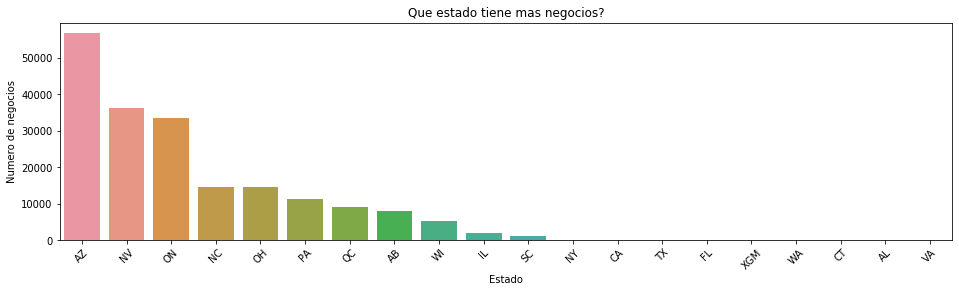

In [15]:
x=df["estado"].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax=sns.barplot(x.index, x.values)
plt.title("Que estado tiene mas negocios?")
l, label = plt.xticks()
plt.setp(label, rotation=45)
plt.ylabel("Numero de negocios")
plt.xlabel("Estado")
plt.show()


Aqui podemos comprobar cuales son los estados que más negocios tienen, en este caso los que destacan son Arizona y Nevada en EEUU y Ontario en Canadá. Por lo que pensamos que las ciudades que más negocios tendrán pertenecerán a estos estados, para comprobarlo se mirará la distribución de los negocios por ciudad.

## Distribución de negocios por ciudades

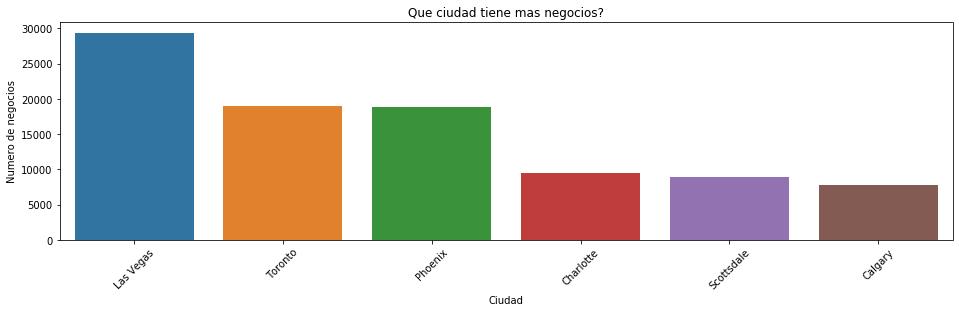

In [16]:
y=df["ciudad"].value_counts()
y=y.sort_values(ascending=False)
y=y.iloc[0:6]
plt.figure(figsize=(16,4))
ay=sns.barplot(y.index, y.values)
plt.title("Que ciudad tiene mas negocios?")
l, label = plt.xticks()
plt.setp(label, rotation=45)
plt.ylabel("Numero de negocios")
plt.xlabel("Ciudad")
plt.show()


Aqui podemos comprobar que el mayor número de negocios se encuentran en Las Vegas, Toronto y Phoenix que son ciudades de los tres estados que más negocios tienen. Serán estas ciudades las que tengamos en cuenta para comprobar que tipo de negocios son más aconsejables abrir como ya se ha mencionado antes. Pero para comprobar esto se necisita realizar una relación entre el dataset de negocios y el datsset de opiniones por lo que se tratará más adelante.

## Representación de la posición de los negocios

Ahora, como sabemos, todos los negocios del dataset se encuentran en Norte América, por lo que vamos a observar como se encuentran distribuidos.

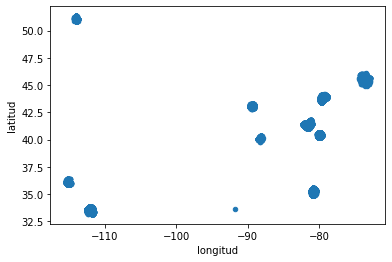

In [17]:
df.plot(kind="scatter", x="longitud", y="latitud", alpha=1) 
plt.show()

En esta gráfica podemos observar, aunque no del todo bien, donde se situán los negocios, lo cual puede ser intersante para observar cual sería la ubicación correcta para un posible negocio nuevo. Por ello vamos a tratar de observar como se distribuyen en el mejor de los estados.

## Negocios Arizona

In [18]:
grouped = df.groupby('estado')
dfAz=grouped.get_group("AZ")

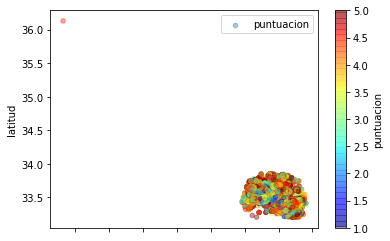

In [19]:
dfAz.plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

En Arizona podemos observar que la fuente de negocios se centra en torno a un punto. Si buscamos cual es ese punto en Google Maps, vemos que se centra en torno a Pheonix (que es una de las ciudades que más negocios tienen en general). Por lo que en vez de centrarnos en todo el estado de Arizona vamos a pasar a Pheonix y así poder comprobar si con una simple gráfica de punto se puede observar la distribución de los negocios.

## Negocios Pheonix

In [20]:
grouped = dfAz.groupby('ciudad')
dfPhx=grouped.get_group("Phoenix")

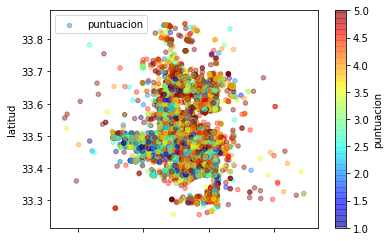

In [21]:
dfPhx.plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

En la gráfica anterior, donde se represntan los negocios en Pheonix, no se puede ver muy bien un distribución de los negocios por lo que vamos a pasar a una reprsentación en forma de mapa que se vera en el documento de análisis de negocios II. 